# Laboratorio 4 | Data Science
* **Mónica Salvatierra** - 22249
* **Derek Arreaga** - 22537

Los objetivos de este laboratorio son:
1. Comprender la diferencia entre una red neuronal multicapa simple (ANN) y una red
convolucional (CNN) para clasificación de imágenes.

2. Implementar desde cero una CNN en Keras/TensorFlow para el conjunto de datos
CIFAR-10.

3. Entrenar, evaluar y analizar los resultados obtenidos con respecto a un modelo ANN
simple.

4. Reflexionar sobre las ventajas y limitaciones de las CNN en visión por computadora.

5. Aplicar “Data Augmentation” para mejorar la capacidad
de generalización del modelo

## **Parte 1: Preparación del Conjunto de Datos (CIFAR-10)**

In [ ]:
#%pip install numpy matplotlib tensorflow
#%pip install keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


Note: you may need to restart the kernel to use updated packages.


**1. Importar y cargar el conjunto de datos CIFAR-10**

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step


In [4]:
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape)

Tamaño del conjunto de entrenamiento: (50000, 32, 32, 3)
Tamaño del conjunto de prueba: (10000, 32, 32, 3)


In [5]:
min_val = np.min(x_train)
max_val = np.max(x_train)

print(f"Valor mínimo: {min_val}")
print(f"Valor máximo: {max_val}")

Valor mínimo: 0
Valor máximo: 255


**2. Normalizar los datos: de rango [0,255] a [0,1]**

Como se observó anteriormente, los valores de nuestro **dataset** son entre **0** y **255**, ahora los normalizamos para que sean entre **0.0** a **1.0**

In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Valores normalizados en rango:", x_train.min(), "a", x_train.max())


Valores normalizados en rango: 0.0 a 1.0


**Ejemplos de Imágenes**

Para desplegar los ejemplos, visitamos la documentación oficial del dataset [**CIFAR-10**](https://www.cs.toronto.edu/~kriz/cifar.html), ahí encontramos que las categorías de las imágenes corresponden a los siguientes números:

|Categoría|Índice|
|---|---|
|avión|0|
|auto| 1|
|pájaro| 2|
|gato| 3|
|ciervo|4|
|perro| 5|
|rana|  6|
|caballo|7|
|barco|8|
|camión| 9|



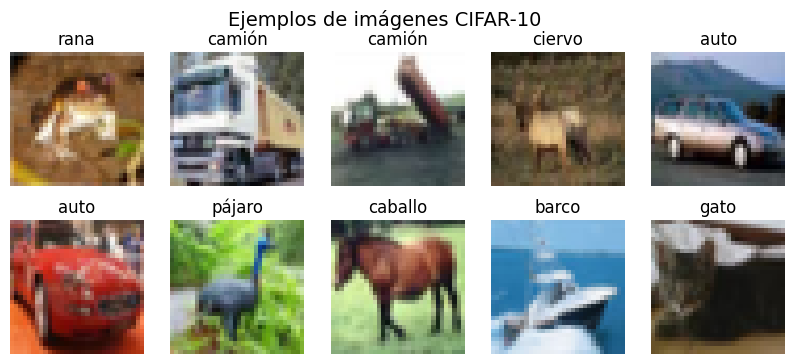

In [8]:
class_names = ["avión", "auto", "pájaro", "gato", "ciervo",
            "perro", "rana", "caballo", "barco", "camión"]

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.suptitle("Ejemplos de imágenes CIFAR-10", fontsize=14)
plt.show()


## **Parte 2: Modelo Base ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import time

Definición del modelo ANN

In [ ]:

model_ann = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),      
    layers.Dense(512, activation='relu'),       
    layers.Dense(256, activation='relu'),       
    layers.Dense(10, activation='softmax')      
])

Compilación del modelo

In [27]:

model_ann.compile(
    optimizer='adam',                           
    loss='sparse_categorical_crossentropy',     
    metrics=['accuracy']                        
)

Entrenamiento

In [28]:

start_time = time.time()

history_ann = model_ann.fit(
    x_train, y_train,
    epochs=20,
    batch_size=256,
    validation_split=0.2,    
    verbose=2
)

end_time = time.time()
train_time = end_time - start_time
print(f" Tiempo total de entrenamiento ANN: {train_time:.2f} segundos")

Epoch 1/20
157/157 - 5s - 30ms/step - accuracy: 0.2907 - loss: 2.0028 - val_accuracy: 0.3504 - val_loss: 1.8217
Epoch 2/20
157/157 - 3s - 22ms/step - accuracy: 0.3728 - loss: 1.7501 - val_accuracy: 0.3680 - val_loss: 1.7948
Epoch 3/20
157/157 - 3s - 22ms/step - accuracy: 0.4083 - loss: 1.6558 - val_accuracy: 0.4075 - val_loss: 1.6645
Epoch 4/20
157/157 - 4s - 23ms/step - accuracy: 0.4284 - loss: 1.5961 - val_accuracy: 0.4062 - val_loss: 1.6771
Epoch 5/20
157/157 - 4s - 24ms/step - accuracy: 0.4489 - loss: 1.5527 - val_accuracy: 0.4214 - val_loss: 1.6246
Epoch 6/20
157/157 - 4s - 23ms/step - accuracy: 0.4609 - loss: 1.5126 - val_accuracy: 0.4355 - val_loss: 1.5962
Epoch 7/20
157/157 - 3s - 22ms/step - accuracy: 0.4722 - loss: 1.4874 - val_accuracy: 0.4545 - val_loss: 1.5420
Epoch 8/20
157/157 - 4s - 23ms/step - accuracy: 0.4845 - loss: 1.4489 - val_accuracy: 0.4718 - val_loss: 1.5074
Epoch 9/20
157/157 - 4s - 25ms/step - accuracy: 0.4935 - loss: 1.4238 - val_accuracy: 0.4584 - val_loss:

## **Parte 3: Implementación CNN**

Definición del modelo

In [30]:
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

C:\Users\Ale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilación del modelo

In [31]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Callbacks

In [32]:

early = EarlyStopping(
    monitor='val_loss',
    patience=5,           
    restore_best_weights=True
)

ckpt = ModelCheckpoint(
    filepath='cnn_best.keras',
    monitor='val_loss',
    save_best_only=True
)

start = time.time()
history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=40,            
    batch_size=128,
    validation_split=0.2,
    callbacks=[early, ckpt],
    verbose=2
)
end = time.time()
cnn_train_time = end - start
print(f" Tiempo total de entrenamiento CNN: {cnn_train_time:.2f} s")


Epoch 1/40
313/313 - 28s - 88ms/step - accuracy: 0.3325 - loss: 1.8177 - val_accuracy: 0.4694 - val_loss: 1.4595
Epoch 2/40
313/313 - 25s - 81ms/step - accuracy: 0.4843 - loss: 1.4244 - val_accuracy: 0.5756 - val_loss: 1.1903
Epoch 3/40
313/313 - 28s - 90ms/step - accuracy: 0.5526 - loss: 1.2458 - val_accuracy: 0.6112 - val_loss: 1.1090
Epoch 4/40
313/313 - 26s - 83ms/step - accuracy: 0.5913 - loss: 1.1441 - val_accuracy: 0.6503 - val_loss: 0.9864
Epoch 5/40
313/313 - 26s - 83ms/step - accuracy: 0.6220 - loss: 1.0700 - val_accuracy: 0.6797 - val_loss: 0.9051
Epoch 6/40
313/313 - 26s - 83ms/step - accuracy: 0.6462 - loss: 1.0010 - val_accuracy: 0.7037 - val_loss: 0.8513
Epoch 7/40
313/313 - 26s - 84ms/step - accuracy: 0.6649 - loss: 0.9573 - val_accuracy: 0.7185 - val_loss: 0.8040
Epoch 8/40
313/313 - 26s - 82ms/step - accuracy: 0.6815 - loss: 0.9120 - val_accuracy: 0.7261 - val_loss: 0.7878
Epoch 9/40
313/313 - 25s - 81ms/step - accuracy: 0.6923 - loss: 0.8738 - val_accuracy: 0.7396 - 

Gráficas de desempeño

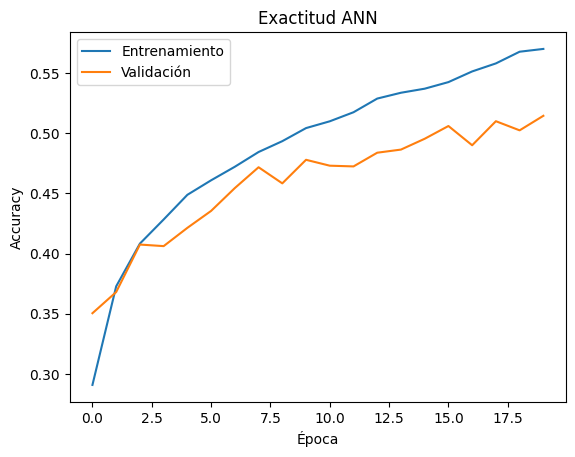

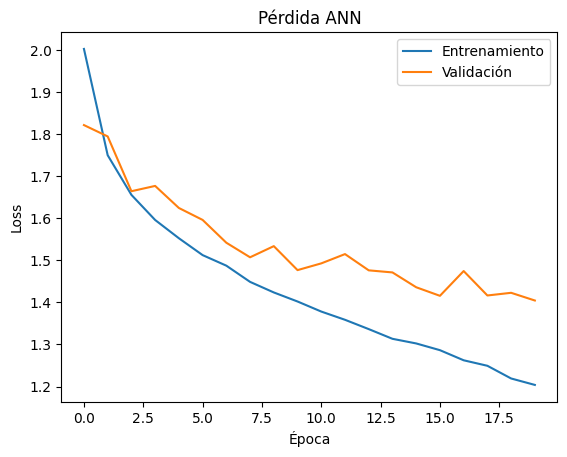

In [34]:
# Exactitud
plt.plot(history_ann.history['accuracy'], label='Entrenamiento')
plt.plot(history_ann.history['val_accuracy'], label='Validación')
plt.title('Exactitud ANN')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Pérdida
plt.plot(history_ann.history['loss'], label='Entrenamiento')
plt.plot(history_ann.history['val_loss'], label='Validación')
plt.title('Pérdida ANN')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

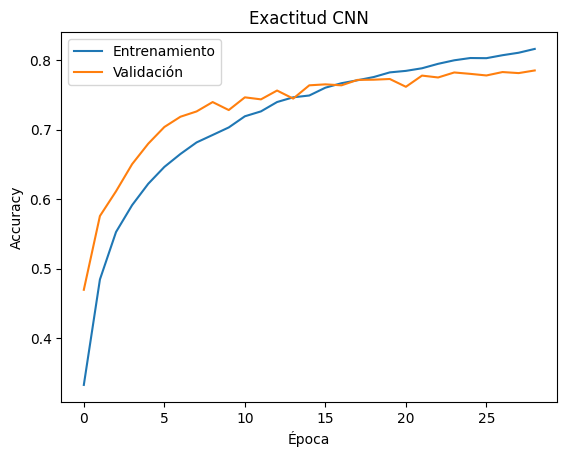

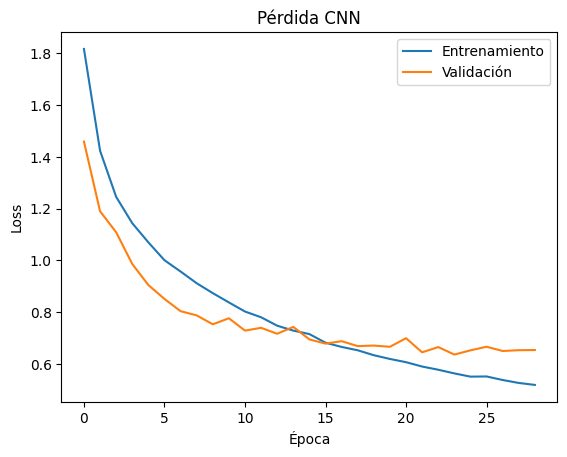

In [33]:
# Exactitud
plt.plot(history_cnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Validación')
plt.title('Exactitud CNN')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Pérdida
plt.plot(history_cnn.history['loss'], label='Entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Validación')
plt.title('Pérdida CNN')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **5. Reflexión Crítica**

- ¿Por qué la CNN supera (o no) al modelo ANN en este problema?
- ¿Qué papel juegan las capas de convolución y pooling?
- ¿Qué mejoras aplicaría? (data augmentation, arquitecturas más profundas, batch
normalization)